<a href="https://colab.research.google.com/github/micherjo/DrugReviewsDataMining/blob/main/INLS_690_Project_Exploratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load data and import libraries

In [ ]:
# for basic operations
import numpy as np
import pandas as pd

# for basic visualizations
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
plt.style.use('fivethirtyeight')

# for advanced visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff




**Reading the data**

In [ ]:
data = pd.read_csv('DrugReviewData.tsv', delimiter = '\t', quoting = 1, engine='python', encoding='utf-8', error_bad_lines=False)
# getting the shape of the data
data.shape



Skipping line 150187: unexpected end of data


(150185, 6)

# Describe Data

In [ ]:
data.head()

,drugName,condition,review,rating,date,usefulCount
0,Mirtazapine,Depression,"""I've tried a few antidepressants over the yea...",10.0,2012-02-28T00:00:00Z,22
1,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn's disease and has done very ...",8.0,2009-05-17T00:00:00Z,17
2,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9.0,2017-09-29T00:00:00Z,3
3,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9.0,2017-03-05T00:00:00Z,35
4,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9.0,2015-10-22T00:00:00Z,4


In [ ]:
# describing the data set
data.describe()


,rating,usefulCount
count,150185.000000,150185.000000
mean,6.987635,28.023544
std,3.278415,36.549726
min,1.000000,0.000000
25%,5.000000,6.000000
50%,8.000000,16.000000
75%,10.000000,36.000000
max,10.000000,1291.000000


In [ ]:
# checking if there is any null data

nan_rating_rows = data[data['rating'].isnull()]
print("Rows with no ratings:", nan_rating_rows, "\n")

nan_useful_rows = data[data['usefulCount'].isnull()]
print("Rows with no usefulCount number:", nan_useful_rows, "\n")

nan_drug_rows = data[data['drugName'].isnull()]
print("Rows with no drug:", nan_drug_rows, "\n")

nan_cond_rows = data[data['condition'].isnull()]
print("Rows with no condition:", nan_cond_rows, "\n")

nan_review_rows = data[data['review'].isnull()]
print("Rows with no review:", nan_drug_rows, "\n")

Rows with no ratings: Empty DataFrame
Columns: [drugName, condition, review, rating, date, usefulCount]
Index: [] 

Rows with no usefulCount number: Empty DataFrame
Columns: [drugName, condition, review, rating, date, usefulCount]
Index: [] 

Rows with no drug: Empty DataFrame
Columns: [drugName, condition, review, rating, date, usefulCount]
Index: [] 

Rows with no condition:                                 drugName  ... usefulCount
34                            Lorcaserin  ...          21
136                Microgestin Fe 1 / 20  ...          12
146     Drospirenone / ethinyl estradiol  ...           8
156                       Levonorgestrel  ...           0
211                         Tri-Sprintec  ...           0
...                                  ...  ...         ...
149807                         Modafinil  ...           9
149896                            Plan B  ...           7
149942                        Seasonique  ...           3
150161                            Latuda

## Add column for number of words in each review (word_count)

In [ ]:
data['word_count'] = data['review'].apply(lambda x: len(str(x).split(" ")))
#data[['review','word_count']].head()

data.groupby('word_count').describe().sample(10)

rating                             ...   length                         
            count       mean       std   min  ...      25%     50%      75%     max
word_count                                    ...                                  
268           2.0  10.000000  0.000000  10.0  ...  1415.00  1415.0  1415.00  1415.0
149         928.0   7.242457  3.118039   1.0  ...   734.00   745.0   751.00   845.0
96          874.0   7.149886  3.127560   1.0  ...   481.00   500.0   523.00   692.0
457           2.0   1.000000  0.000000   1.0  ...  2420.00  2420.0  2420.00  2420.0
151         731.0   7.466484  3.068606   1.0  ...   739.00   747.0   752.00   839.0
81          976.0   6.918033  3.235293   1.0  ...   404.00   420.0   442.00   566.0
359           1.0  10.000000       NaN  10.0  ...  1912.00  1912.0  1912.00  1912.0
70          950.0   6.769474  3.376999   1.0  ...   350.25   367.0   384.00   488.0
333           1.0   9.000000       NaN   9.0  ...  1722.00  1722.0  1722.00  1722.0
199           6.0   8.500000  2.258318   4.0  ...  1020.25  1040.5  1063.75  1112.0

[10 rows x 24 columns]

## Add column for average length of each word in the review

In [ ]:
def avg_word_len(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

data['avg_word_len'] = data['review'].apply(lambda x: avg_word(x))
data[['review','avg_word_len']].head()

,review,avg_word_len
0,"""I've tried a few antidepressants over the yea...",5.264706
1,"""My son has Crohn's disease and has done very ...",4.333333
2,"""Quick reduction of symptoms""",6.500000
3,"""Contrave combines drugs that were used for al...",4.265734
4,"""I have been on this birth control for one cyc...",4.053691


## Add column for total length of each review (number of characters)

In [ ]:
# adding a length column for analyzing the length of the reviews

data['length'] = data['review'].apply(len)
data[['review','length']].head()

data.groupby('length').describe().sample(10)

rating                             ... word_count                     
        count       mean       std   min  ...        25%    50%    75%    max
length                                    ...                                
952       2.0   9.000000  1.414214   8.0  ...      185.0  187.0  189.0  191.0
562     164.0   6.408537  3.437102   1.0  ...      104.0  108.0  111.0  123.0
670     167.0   7.437126  2.898992   1.0  ...      123.0  128.0  132.5  144.0
727     354.0   7.197740  3.124498   1.0  ...      134.0  139.0  144.0  185.0
584     162.0   7.228395  3.048826   1.0  ...      107.0  111.0  115.0  128.0
675     183.0   6.590164  3.111713   1.0  ...      124.0  130.0  134.5  144.0
1107      1.0  10.000000       NaN  10.0  ...      208.0  208.0  208.0  208.0
141     162.0   6.666667  3.583953   1.0  ...       25.0   27.0   28.0   32.0
1015      2.0   9.000000  0.000000   9.0  ...      199.0  199.0  199.0  199.0
294     198.0   6.702020  3.564788   1.0  ...       53.0   56.0   59.0   66.0

[10 rows x 24 columns]

## Add column for number of stop words in each review

In [ ]:

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['stopwords'] = data['review'].apply(lambda x: len([x for x in x.split() if x in stop]))
data[['review','stopwords']].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,review,stopwords
0,"""I've tried a few antidepressants over the yea...",24
1,"""My son has Crohn's disease and has done very ...",20
2,"""Quick reduction of symptoms""",1
3,"""Contrave combines drugs that were used for al...",66
4,"""I have been on this birth control for one cyc...",68


## More work needed: Add column for number of ALLCAPS words in each review

In [ ]:
data['upper'] = data['review'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
data[['review','upper']].head()

,review,upper
0,"""I've tried a few antidepressants over the yea...",2
1,"""My son has Crohn's disease and has done very ...",0
2,"""Quick reduction of symptoms""",0
3,"""Contrave combines drugs that were used for al...",10
4,"""I have been on this birth control for one cyc...",10


## Describe data by distribution of ratings


In [ ]:
data.groupby('rating').describe()

length                                                           
          count        mean         std  min    25%    50%    75%      max
rating                                                                    
1.0     28918.0  419.166678  239.019490  5.0  221.0  396.0  637.0   3638.0
2.0      9265.0  443.925850  248.962799  9.0  252.0  438.0  662.0  10349.0
3.0      8718.0  447.211287  230.897890  8.0  266.0  441.0  659.0   4971.0
4.0      6671.0  454.101484  223.639257  5.0  277.0  448.0  672.0   2955.0
5.0     10723.0  466.930896  219.293018  6.0  287.0  470.0  686.0   1975.0
6.0      8462.0  457.854762  221.685936  4.0  278.0  459.0  671.0   2101.0
7.0     12547.0  473.541245  226.186176  6.0  286.0  487.0  693.5   2942.0
8.0     25046.0  471.697556  228.431712  3.0  287.0  484.0  695.0   3985.0
9.0     36708.0  466.913316  234.676245  3.0  278.0  475.0  694.0   6024.0
10.0    68005.0  434.374090  238.950853  3.0  238.0  426.0  664.0   6018.0

## Describe data by distribution of drugName

In [ ]:
data.groupby('drugName').describe().sample(10)

length  ...       
                                                    count  ...    max
drugName                                                   ...       
Canasa Pac                                            1.0  ...  320.0
Boceprevir                                            2.0  ...  169.0
Darifenacin                                          19.0  ...  640.0
Belimumab                                            18.0  ...  752.0
Acetaminophen / dextromethorphan / doxylamine /...    5.0  ...  319.0
Norpace                                               2.0  ...  461.0
Robitussin Cough + Chest Congestion DM                2.0  ...   29.0
Lantus                                               23.0  ...  755.0
Zelnorm                                              22.0  ...  751.0
Amaryl                                               15.0  ...  755.0

[10 rows x 8 columns]

## Describe data by usefulCount

In [ ]:
data.groupby('usefulCount').describe().sample(10)

length                          ...                       
             count        mean         std  ...    50%     75%     max
usefulCount                                 ...                       
337            1.0  725.000000         NaN  ...  725.0  725.00   725.0
392            2.0  637.000000    0.000000  ...  637.0  637.00   637.0
156           67.0  457.089552  216.114920  ...  455.0  649.00   767.0
356            2.0  201.000000    0.000000  ...  201.0  201.00   201.0
221           13.0  535.230769  176.430890  ...  490.0  675.00   796.0
771            2.0  487.000000    0.000000  ...  487.0  487.00   487.0
170           35.0  518.685714  214.342191  ...  645.0  716.00   757.0
53           878.0  446.768793  233.148878  ...  441.0  689.00  1267.0
323            1.0  685.000000         NaN  ...  685.0  685.00   685.0
117          160.0  517.950000  244.151819  ...  540.0  712.75  1963.0

[10 rows x 8 columns]

## Describe data by condition




In [ ]:
data.groupby('condition').describe().sample(10)

length                          ...                       
                          count        mean         std  ...    50%     75%     max
condition                                                ...                       
Meniere's Disease          28.0  461.214286  181.786883  ...  496.0  573.50   751.0
Raynaud's Syndrome         63.0  329.920635  186.237907  ...  306.0  440.50   754.0
Weight Loss              4857.0  485.426807  217.052719  ...  490.0  711.00  2288.0
Pupillary Dilation          7.0  441.714286  210.051354  ...  509.0  516.50   752.0
Bleeding Disorder           9.0  509.777778  181.192424  ...  481.0  716.00   746.0
Gingivitis                 11.0  362.818182  232.773632  ...  317.0  506.50   736.0
moterol / mometasone)      36.0  383.055556  239.044400  ...  342.0  627.75   745.0
Breast Cancer, Adjuvant    25.0  563.520000  184.476765  ...  593.0  719.00   760.0
Coccidioidomycosis          2.0  736.000000    0.000000  ...  736.0  736.00   736.0
Neuritis                    1.0   42.000000         NaN  ...   42.0   42.00    42.0

[10 rows x 8 columns]

## Top 20 conditions with reviews

In [ ]:
conditions = data.condition.value_counts().sort_values(ascending=False)
conditions[:20]

Birth Control                26779
Depression                    8503
Pain                          5690
Anxiety                       5403
Acne                          5206
Bipolar Disorder              3898
Insomnia                      3460
Weight Loss                   3414
Obesity                       3318
ADHD                          3101
Diabetes, Type 2              2389
Emergency Contraception       2329
Vaginal Yeast Infection       2201
High Blood Pressure           2147
Abnormal Uterine Bleeding     1884
Bowel Preparation             1772
Smoking Cessation             1739
Fibromyalgia                  1662
Migraine                      1589
Anxiety and Stress            1567
Name: condition, dtype: int64

## Top 20 drugs with reviews

In [ ]:
drugs = data.drugName.value_counts().sort_values(ascending=False)
drugs[:20]

Levonorgestrel                        3468
Etonogestrel                          3035
Ethinyl estradiol / norethindrone     2560
Nexplanon                             2024
Ethinyl estradiol / norgestimate      1919
Ethinyl estradiol / levonorgestrel    1749
Phentermine                           1461
Sertraline                            1338
Escitalopram                          1218
Mirena                                1176
Implanon                              1041
Gabapentin                             992
Bupropion                              959
Venlafaxine                            941
Citalopram                             939
Miconazole                             931
Medroxyprogesterone                    917
Duloxetine                             852
Bupropion / naltrexone                 852
Metronidazole                          847
Name: drugName, dtype: int64

# Classify Drugs by Drug Groups using suffix


## Rules to classify drugs by suffix 
**Note**: Needs updating

In [ ]:
drug_suffix = {"azole":"antifungal (except metronidazole)",
"caine":"anesthetic",
"cillin":"antibiotic(penicillins)",
"mycin":"antibiotic",
"micin":"antibiotic",
"cycline":"antibiotic",
"oxacin":"antibiotic",
"ceph":"antibiotic(cephalosporins)",
"cef":"antibiotic (cephalosporins)",
"dine":"h2 blockers (anti-ulcers)",
"done":"opiod analgesics",
"ide":"oral hypoglycemics",
"lam":"anti-anxiety",
"pam":"anti-anxiety",
"mide":"diuretics",
"zide":"diuretics",
"nium":"neuromuscular blocking agents",
"olol":"beta blockers",
"tidine":"h2 antagonist",
"tropin":"pituitary hormone",
"zosin":"alpha blocker",
"ase":"thrombolytics",
"plase":"thrombolytics",
"azepam":"anti-anziety(benzodiazepine)",
"azine":"antipyschotics (phenothiazine)",
"barbital":"barbiturate",
"dipine":"calcium channel blocker",
"lol":"beta blockers",
"zolam":"cns depressants",
"pril":"ace inhibitor",
"artan":"arb blocker",
"statins":"lipid-lowering drugs",
"parin":"anticoagulants",
"sone":"corticosteroid (prednisone)"}

In [ ]:
def classify_drug(drugName):
    for i in drug_suffix.keys():
        if drugName.endswith(i):
            #print(True)
             return drug_suffix[i]

In [ ]:
classify_drug('atenolol')

'beta blockers'

In [ ]:
classify_drug('Escitalopam')

'anti-anxiety'

## Run function to add drug class to each drugName

In [ ]:
data['drug_class'] = data['drugName'].apply(classify_drug)

In [ ]:
data[['drugName','drug_class']]

,drugName,drug_class
0,Mirtazapine,None
1,Mesalamine,None
2,Bactrim,None
3,Contrave,None
4,Cyclafem 1 / 35,None
...,...,...
150180,Desogestrel / ethinyl estradiol,None
150181,Citalopram,None
150182,Vyvanse,None
150183,Nexplanon,None


In [ ]:
# Group Unique Drug Classes to a list
data['drug_class'].unique().tolist()

[None,
 'opiod analgesics',
 'antifungal (except metronidazole)',
 'antibiotic',
 'anti-anxiety',
 'calcium channel blocker',
 'antipyschotics (phenothiazine)',
 'h2 blockers (anti-ulcers)',
 'oral hypoglycemics',
 'beta blockers',
 'barbiturate',
 'ace inhibitor',
 'antibiotic (cephalosporins)',
 'pituitary hormone',
 'corticosteroid (prednisone)',
 'alpha blocker',
 'anesthetic',
 'thrombolytics',
 'antibiotic(penicillins)',
 'arb blocker',
 'neuromuscular blocking agents',
 'anticoagulants']

In [ ]:
data.groupby('drug_class').describe().sample(10)


rating            ...  length        
                                count      mean  ...     75%     max
drug_class                                       ...                
opiod analgesics               3697.0  7.452259  ...  598.00  1864.0
neuromuscular blocking agents    50.0  8.500000  ...  493.25   797.0
anti-anxiety                   2483.0  8.476843  ...  622.50  2319.0
h2 blockers (anti-ulcers)      1182.0  7.149746  ...  560.00  1903.0
thrombolytics                   114.0  6.947368  ...  463.00   775.0
oral hypoglycemics             3285.0  7.252055  ...  678.00  4175.0
ace inhibitor                   385.0  5.766234  ...  501.00   796.0
antibiotic (cephalosporins)      31.0  6.451613  ...  321.00   646.0
antibiotic                     3211.0  6.543444  ...  630.00  2421.0
calcium channel blocker         226.0  5.150442  ...  613.50   756.0

[10 rows x 32 columns]

## Drug classes with the most reviews

In [ ]:
classes = data.drug_class.value_counts().sort_values(ascending=False)
classes[:20]

antifungal (except metronidazole)    3923
opiod analgesics                     3697
oral hypoglycemics                   3285
antibiotic                           3211
anti-anxiety                         2483
h2 blockers (anti-ulcers)            1182
beta blockers                         975
corticosteroid (prednisone)           824
antipyschotics (phenothiazine)        586
arb blocker                           522
ace inhibitor                         385
calcium channel blocker               226
alpha blocker                         153
anesthetic                            116
thrombolytics                         114
antibiotic(penicillins)               109
neuromuscular blocking agents          50
antibiotic (cephalosporins)            31
pituitary hormone                      22
barbiturate                            21
Name: drug_class, dtype: int64

In [ ]:

drug_groups = data.groupby('drug_class').size()
drug_groups.to_frame()


,0
drug_class,
ace inhibitor,385
alpha blocker,153
anesthetic,116
anti-anxiety,2483
antibiotic,3211
antibiotic (cephalosporins),31
antibiotic(penicillins),109
anticoagulants,12
antifungal (except metronidazole),3923


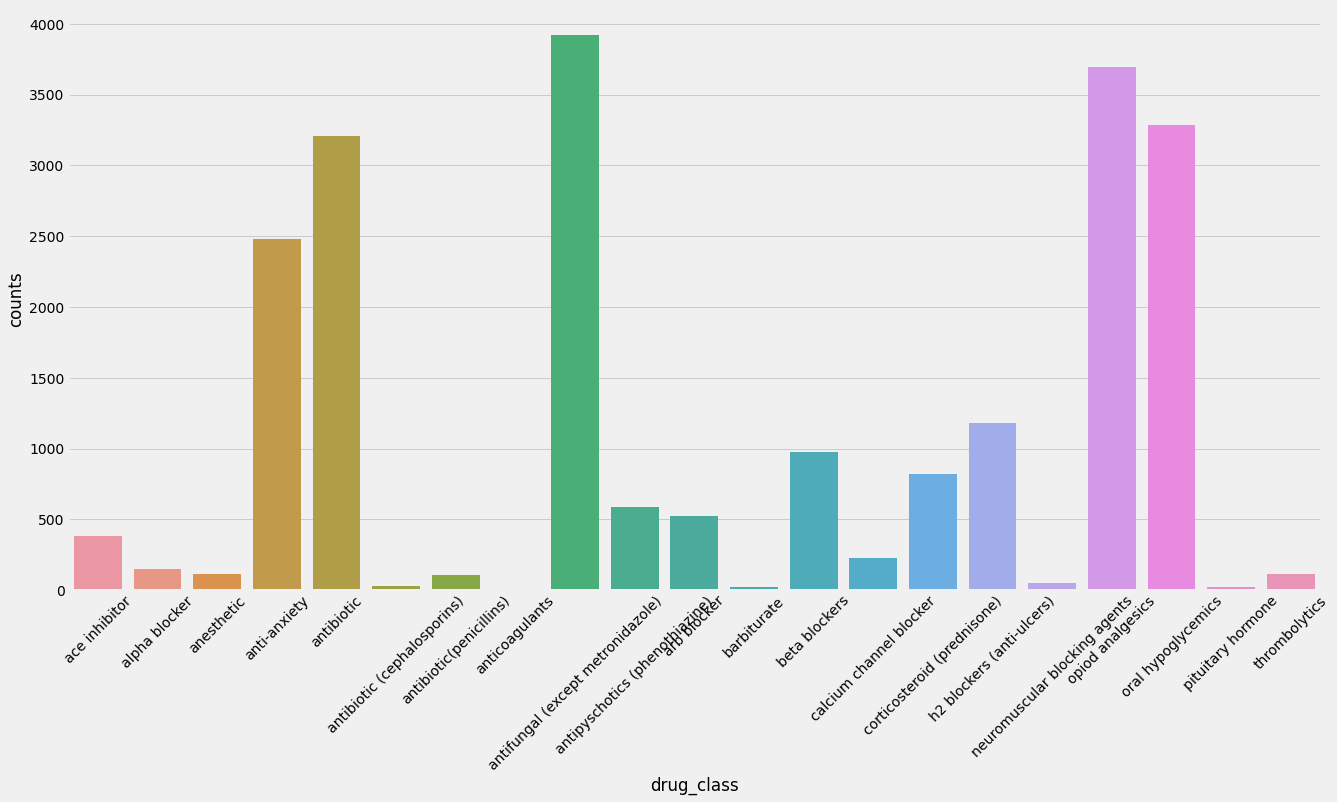

In [ ]:
drug_groups_df = pd.DataFrame({'drug_class':drug_groups.index,'counts':drug_groups.values})
plt.figure(figsize=(20,10))
g = sns.barplot(data=drug_groups_df,x='drug_class',y='counts')
g.set_xticklabels(drug_groups_df['drug_class'].values,rotation=45)
plt.show()
plt.show()

## Average Rating of Drugs By Class

In [ ]:
avg_rating_per_drug_class = (data['rating'].groupby(data['drug_class']).mean())
avg_rating_per_drug_class.nlargest(20)

drug_class
anticoagulants                    9.071429
barbiturate                       8.896552
neuromuscular blocking agents     8.651515
anti-anxiety                      8.499158
pituitary hormone                 7.833333
beta blockers                     7.697040
opiod analgesics                  7.464929
corticosteroid (prednisone)       7.415000
oral hypoglycemics                7.273981
h2 blockers (anti-ulcers)         7.218412
antipyschotics (phenothiazine)    7.119266
alpha blocker                     7.105263
thrombolytics                     7.018634
antibiotic(penicillins)           6.993421
antibiotic                        6.539497
arb blocker                       6.404601
beta blocker                      6.372093
antibiotic (cephalosporins)       6.162791
anesthetic                        5.823864
ace inhibitor                     5.789381
Name: rating, dtype: float64

## Average UsefulCount of Drugs By Class

In [ ]:
avg_rating_per_drug_class = (data['usefulCount'].groupby(data['drug_class']).mean())
avg_rating_per_drug_class.nlargest(20)

drug_class
calcium channel blocker              54.048673
arb blocker                          45.632184
antibiotic(penicillins)              44.366972
ace inhibitor                        42.784416
anti-anxiety                         40.794603
alpha blocker                        37.431373
beta blockers                        37.301538
opiod analgesics                     36.642683
h2 blockers (anti-ulcers)            34.193739
neuromuscular blocking agents        33.280000
oral hypoglycemics                   27.251446
thrombolytics                        27.210526
antipyschotics (phenothiazine)       23.981229
corticosteroid (prednisone)          21.076456
barbiturate                          20.142857
antibiotic                           18.433510
anticoagulants                       17.750000
antibiotic (cephalosporins)          17.516129
antifungal (except metronidazole)    16.573286
anesthetic                           15.879310
Name: usefulCount, dtype: float64

# Classify Drugs by Potential Presence of Adverse Event


## Rules to classify drugs as having AE or not 
**Note**: Needs updating

In [ ]:
a_e = ("constipation", "nausea", "vomiting", "fatigue", "weight loss", "weight gain",
       "hair loss", "alopecia", "drowsiness," "rash", "diarrhea", "sleep")

In [ ]:
def classify_ae(drugName):
    for word in data['review']:
        if word in a_e:
            print(True)
             #return drug_suffix[i]

In [ ]:
classify_ae('Klonopin')

In [ ]:
classify_drug('Escitalopam')

'anti-anxiety'

## Run function to classify presence of AE in each drugName

In [ ]:
data['drug_class'] = data['drugName'].apply(classify_drug)

In [ ]:
data[['drugName','drug_class']]

,drugName,drug_class
0,Mirtazapine,None
1,Mesalamine,None
2,Bactrim,None
3,Contrave,None
4,Cyclafem 1 / 35,None
...,...,...
150180,Desogestrel / ethinyl estradiol,None
150181,Citalopram,None
150182,Vyvanse,None
150183,Nexplanon,None


In [ ]:
# Group Unique Drug Classes to a list
data['drug_class'].unique().tolist()

[None,
 'opiod analgesics',
 'antifungal (except metronidazole)',
 'antibiotic',
 'anti-anxiety',
 'calcium channel blocker',
 'antipyschotics (phenothiazine)',
 'h2 blockers (anti-ulcers)',
 'oral hypoglycemics',
 'beta blockers',
 'barbiturate',
 'ace inhibitor',
 'antibiotic (cephalosporins)',
 'pituitary hormone',
 'corticosteroid (prednisone)',
 'alpha blocker',
 'anesthetic',
 'thrombolytics',
 'antibiotic(penicillins)',
 'arb blocker',
 'neuromuscular blocking agents',
 'anticoagulants']

In [ ]:
data.groupby('drug_class').describe().sample(10)


rating            ...  length        
                                count      mean  ...     75%     max
drug_class                                       ...                
opiod analgesics               3697.0  7.452259  ...  598.00  1864.0
neuromuscular blocking agents    50.0  8.500000  ...  493.25   797.0
anti-anxiety                   2483.0  8.476843  ...  622.50  2319.0
h2 blockers (anti-ulcers)      1182.0  7.149746  ...  560.00  1903.0
thrombolytics                   114.0  6.947368  ...  463.00   775.0
oral hypoglycemics             3285.0  7.252055  ...  678.00  4175.0
ace inhibitor                   385.0  5.766234  ...  501.00   796.0
antibiotic (cephalosporins)      31.0  6.451613  ...  321.00   646.0
antibiotic                     3211.0  6.543444  ...  630.00  2421.0
calcium channel blocker         226.0  5.150442  ...  613.50   756.0

[10 rows x 32 columns]

## Drug classes with the most AEs

In [ ]:
classes = data.drug_class.value_counts().sort_values(ascending=False)
classes[:20]

antifungal (except metronidazole)    3923
opiod analgesics                     3697
oral hypoglycemics                   3285
antibiotic                           3211
anti-anxiety                         2483
h2 blockers (anti-ulcers)            1182
beta blockers                         975
corticosteroid (prednisone)           824
antipyschotics (phenothiazine)        586
arb blocker                           522
ace inhibitor                         385
calcium channel blocker               226
alpha blocker                         153
anesthetic                            116
thrombolytics                         114
antibiotic(penicillins)               109
neuromuscular blocking agents          50
antibiotic (cephalosporins)            31
pituitary hormone                      22
barbiturate                            21
Name: drug_class, dtype: int64

In [ ]:

drug_groups = data.groupby('drug_class').size()
drug_groups.to_frame()


,0
drug_class,
ace inhibitor,385
alpha blocker,153
anesthetic,116
anti-anxiety,2483
antibiotic,3211
antibiotic (cephalosporins),31
antibiotic(penicillins),109
anticoagulants,12
antifungal (except metronidazole),3923


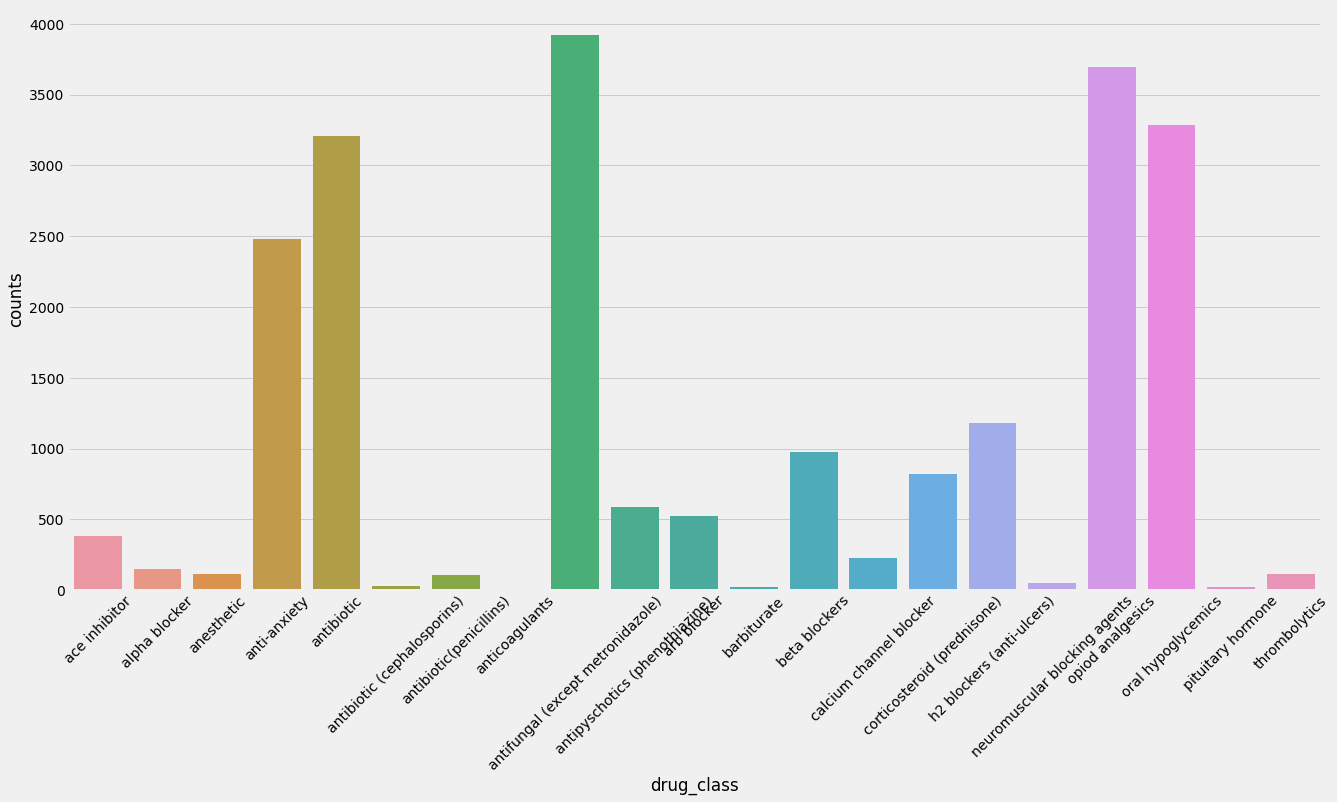

In [ ]:
drug_groups_df = pd.DataFrame({'drug_class':drug_groups.index,'counts':drug_groups.values})
plt.figure(figsize=(20,10))
g = sns.barplot(data=drug_groups_df,x='drug_class',y='counts')
g.set_xticklabels(drug_groups_df['drug_class'].values,rotation=45)
plt.show()
plt.show()

# Data Visualizations - Distributions

## Distribution of User Reviews by Drug Ratings

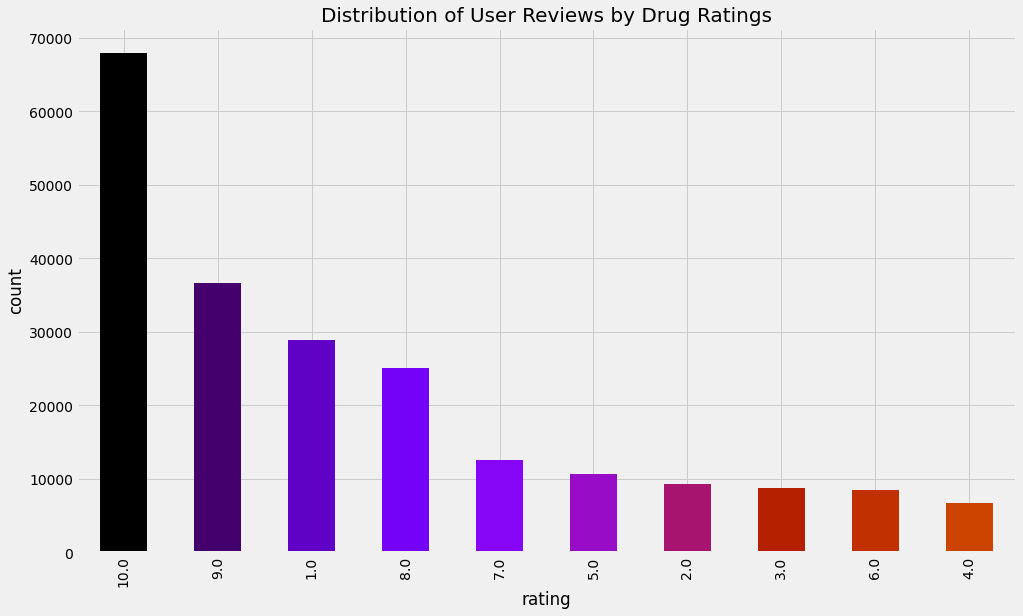

In [ ]:

color = plt.cm.gnuplot(np.linspace(0, 1, 15))
data['rating'].value_counts().plot.bar(color = color, figsize = (15, 9))
plt.title('Distribution of User Reviews by Drug Ratings', fontsize = 20)
plt.xlabel('rating')
plt.ylabel('count')
plt.show()

## Distribution of User Reviews by Drug Ratings (2)

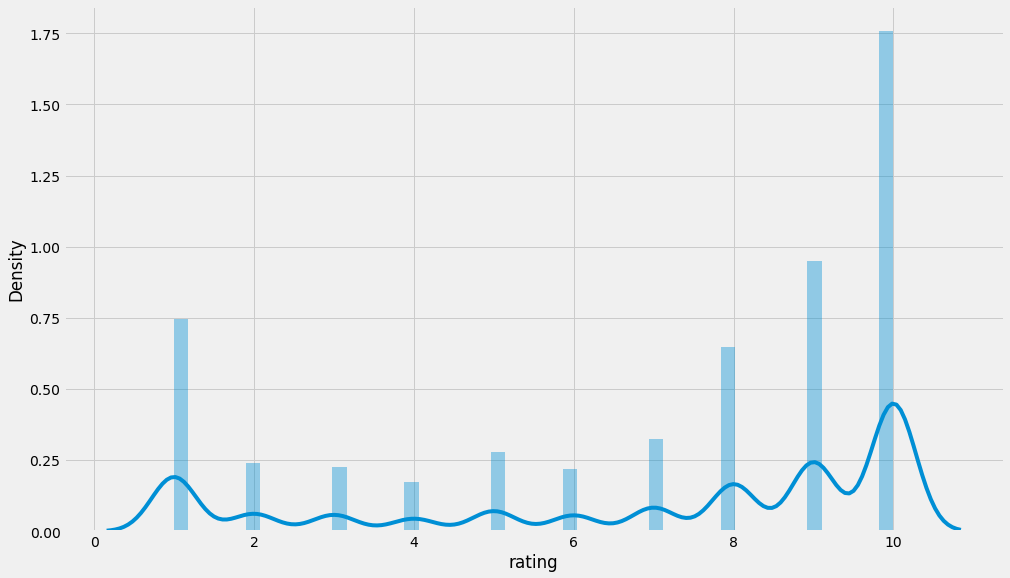

In [ ]:
import seaborn as sns
sns.distplot(data['rating']);

## Usefulness vs Rating

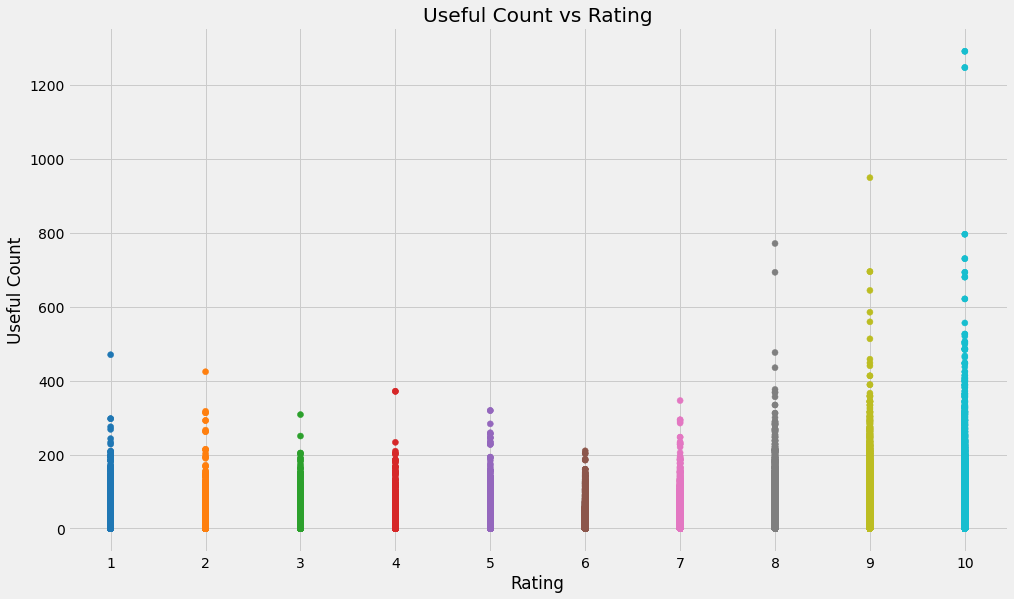

In [ ]:
# Is rating correlated with usefulness of the review?
plt.scatter(data.rating, data.usefulCount, c=data.rating.values, cmap='tab10')
plt.title('Useful Count vs Rating')
plt.xlabel('Rating')
plt.ylabel('Useful Count')
plt.xticks([i for i in range(1, 11)]);

## Average Useful Count by Rating

In [ ]:
# Create array of average usefulness for given ratings
use_ls = []

for i in range(1, 11):
    use_ls.append([i, np.sum(data[data.rating == i].usefulCount) / np.sum([data.rating == i])])
    
use_arr = np.asarray(use_ls)

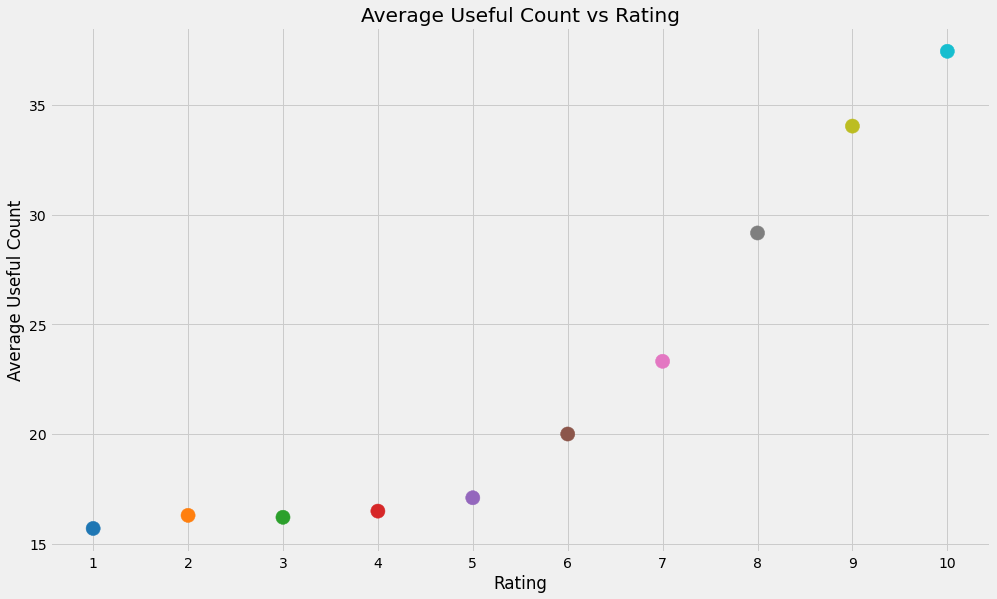

In [ ]:
plt.scatter(use_arr[:, 0], use_arr[:, 1], c=use_arr[:, 0], cmap='tab10', s=200)
plt.title('Average Useful Count vs Rating')
plt.xlabel('Rating')
plt.ylabel('Average Useful Count')
plt.xticks([i for i in range(1, 11)]);

In [ ]:
# Sort train dataframe from most to least useful
useful_train = data.sort_values(by='usefulCount', ascending=False)
useful_train.iloc[:10]

,drugName,condition,review,rating,date,usefulCount,word_count,length,drug_class,avg_word,avg_word_len,stopwords,upper
87318,Zoloft,Depression,"""I remember reading people's opinions, online,...",10.0,2008-07-31T00:00:00Z,1291,187,924,None,3.946524,3.946524,93,11
60482,Sertraline,Depression,"""I remember reading people's opinions, online,...",10.0,2008-07-31T00:00:00Z,1291,187,924,None,3.946524,3.946524,93,11
75474,Levonorgestrel,Birth Control,"""I IUD year I think best thing ever. When I fi...",10.0,2009-04-01T00:00:00Z,1247,114,550,None,3.833333,3.833333,55,11
58015,Mirena,Birth Control,"""I IUD year I think best thing ever. When I fi...",10.0,2009-04-01T00:00:00Z,1247,114,550,None,3.833333,3.833333,55,11
3829,Sertraline,Depression,"""I've Zoloft 50mg two years. I relaxed easy-go...",9.0,2008-08-05T00:00:00Z,949,55,314,None,4.905660,4.905660,23,3
70655,Adipex-P,Weight Loss,"""I used pill past 9 years. I say BEST pill los...",10.0,2008-10-19T00:00:00Z,796,142,703,None,3.957746,3.957746,62,14
112374,Phentermine,Weight Loss,"""I used pill past 9 years. I say BEST pill los...",10.0,2008-10-19T00:00:00Z,796,142,703,None,3.957746,3.957746,62,14
55805,Citalopram,Depression,"""I responded one week. The side effects (letha...",8.0,2008-03-25T00:00:00Z,771,82,487,None,4.951220,4.951220,25,6
28789,Etonogestrel,Birth Control,"""I nervous trying Implanon reading negative re...",10.0,2010-07-19T00:00:00Z,730,142,737,None,4.447761,4.447761,60,6
58984,Implanon,Birth Control,"""I nervous trying Implanon reading negative re...",10.0,2010-07-19T00:00:00Z,730,142,737,None,4.447761,4.447761,60,6


In [ ]:
 #Print top 10 most useful reviews
for i in useful_train.review.iloc[:3]:
    print(i, '\n')

"I remember reading people's opinions, online, drug I took scared away it. Then I finally decided give try best choice I made. I 4 months I feel great. I'm 100mg I side effects. When I first started I notice hands would tremble subsided. So honestly, listen negativity work works amazing others. So go based youself everyone else. It may blessing diguise. The pill meant make happy go lucky see "butterflies roses", meant help put chemicals mind balance overly depressed. I still get sad times, normal, life, people take control make change. I getting pill." 

"I remember reading people's opinions, online, drug I took scared away it. Then I finally decided give try best choice I made. I 4 months I feel great. I'm 100mg I side effects. When I first started I notice hands would tremble subsided. So honestly, listen negativity work works amazing others. So go based youself everyone else. It may blessing diguise. The pill meant make happy go lucky see "butterflies roses", meant help put chemical

In [ ]:
# Print 10 of the least useful reviews
for i in useful_train.review.iloc[-3:]:
    print(i, '\n')

"Ive gone pack half much better Generess FE I years ago. The Gineress made extremely nauseous day long gave horrible acne one month I never even years later I reluctant start taking birth control again. The major side effect Ive experienced diarrhea every morning soon I woke went away soon body adjusted hormones. I also sensitive digestive system diarrhea normal me.Already overweight I concerned potential weight gain preventing loosing weight diet exercise Ive actually lost weight." 

"I many issues birth control around six months. I experienced mood swings unless start period. The experience nausea pill I taken mid day eat absolutely nothing. So far, I gotten pregnant, severe back acne completely cleared up. Overall, I recommend pill." 

"A 1.5 mg dose given 88 year old father slight dementia bed bound stroke various ailments ie advanced prostate cancer. He sunny disposition, although bit upset become bed bound. Natural reaction really. The palliative care nurse saw prescribed encoura

## Distribution of Reviews by Review Length (characters)

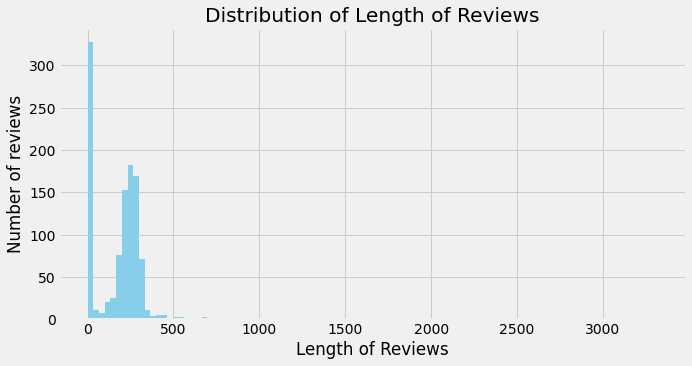

In [ ]:

data['length'].value_counts().plot.hist(color = 'skyblue', figsize = (10, 5), bins = 100)
plt.title('Distribution of Length of Reviews')
plt.xlabel('Length of Reviews')
plt.ylabel('Number of reviews')
plt.show()

In [ ]:
## Distribution of Reviews by Word Count

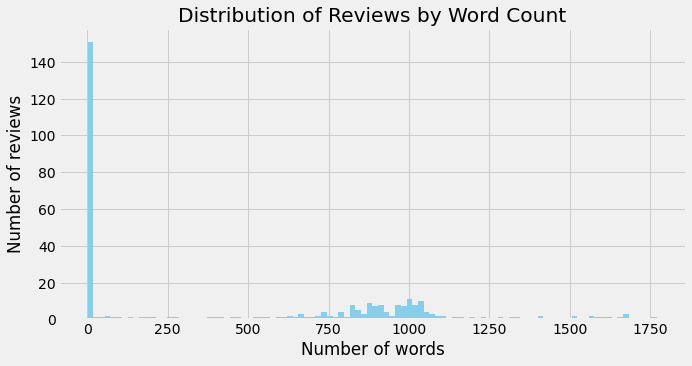

In [ ]:

data['word_count'].value_counts().plot.hist(color = 'skyblue', figsize = (10, 5), bins = 100)
plt.title('Distribution of Reviews by Word Count')
plt.xlabel('Number of words')
plt.ylabel('Number of reviews')
plt.show()

## Distribution of Reviews by UsefulCount

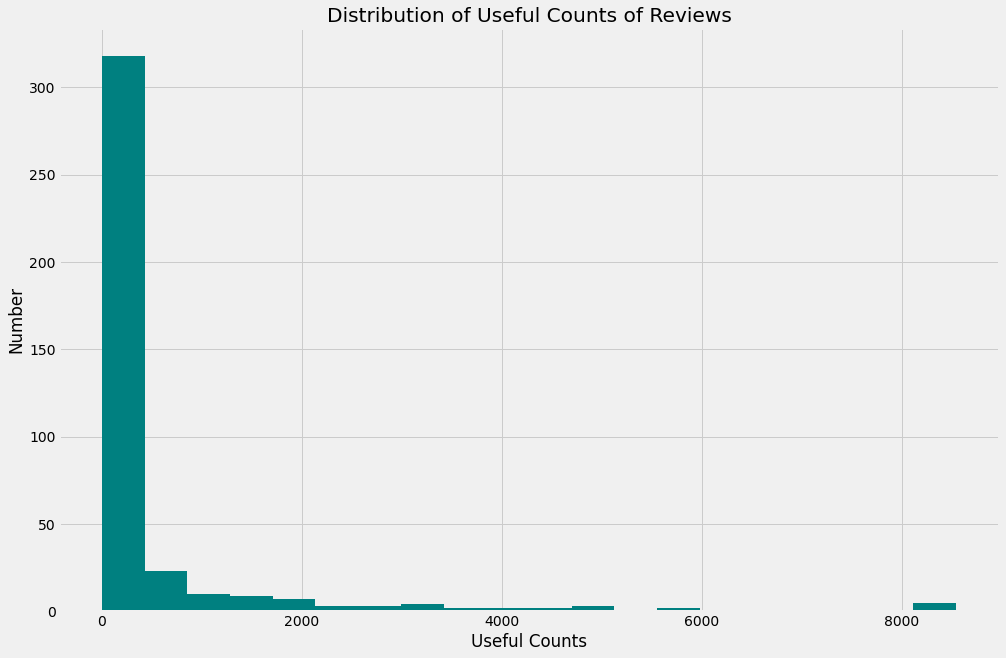

In [ ]:
data['usefulCount'].value_counts().plot.hist(color = 'teal', figsize = (15, 10), bins = 20)
plt.title('Distribution of Useful Counts of Reviews')
plt.xlabel('Useful Counts')
plt.ylabel('Number')
plt.show()

In [ ]:
data[data['length'] == 21]['review'].iloc[0]

'"Fast and effective."'

In [ ]:
data[data['length'] == 50]['review'].iloc[0]

'"This is a great medication with no side effects."'

In [ ]:
data[data['length'] == 150]['review'].iloc[0]

'"I had mild symptoms of a yeast infection. I used the 3-dose tercanozole. It&#039;s caused far more itching and burning than the yeast infection did."'

# Data Visualizations - Comparison Plots 

## Plotting Useful Count vs. Ratings

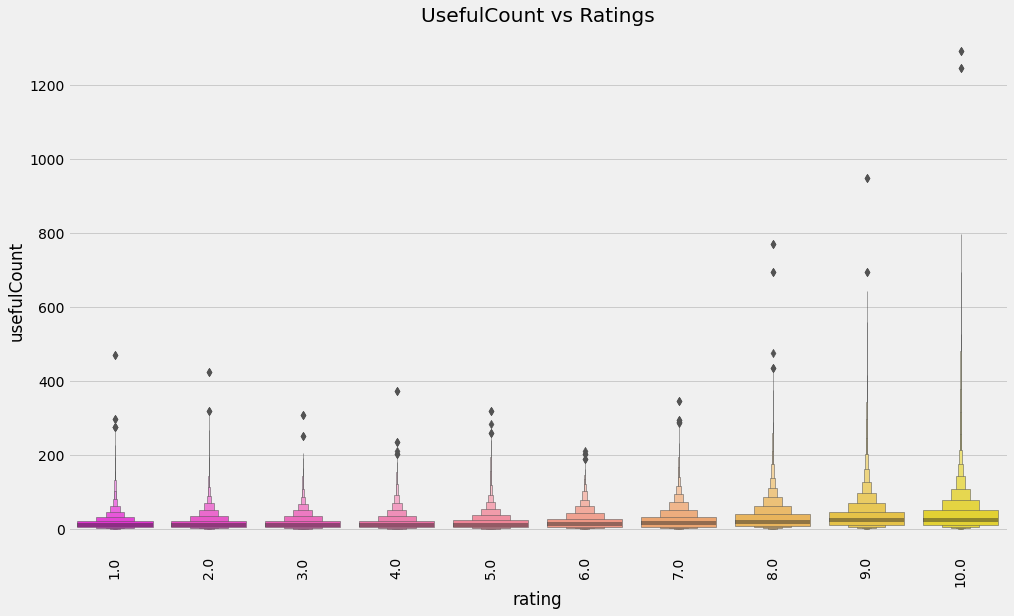

In [ ]:
data['rating'] = np.array(data['rating'], dtype=float)
data['usefulCount'] = np.array(data['usefulCount'], dtype=float)
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')

sns.boxenplot(data['rating'], data['usefulCount'], palette = 'spring')
plt.title("UsefulCount vs Ratings")
plt.xticks(rotation = 90)
plt.show()

The above shows that the higher the rating given to the drug, the more useful others found the review.

## Plotting Review Length vs Ratings

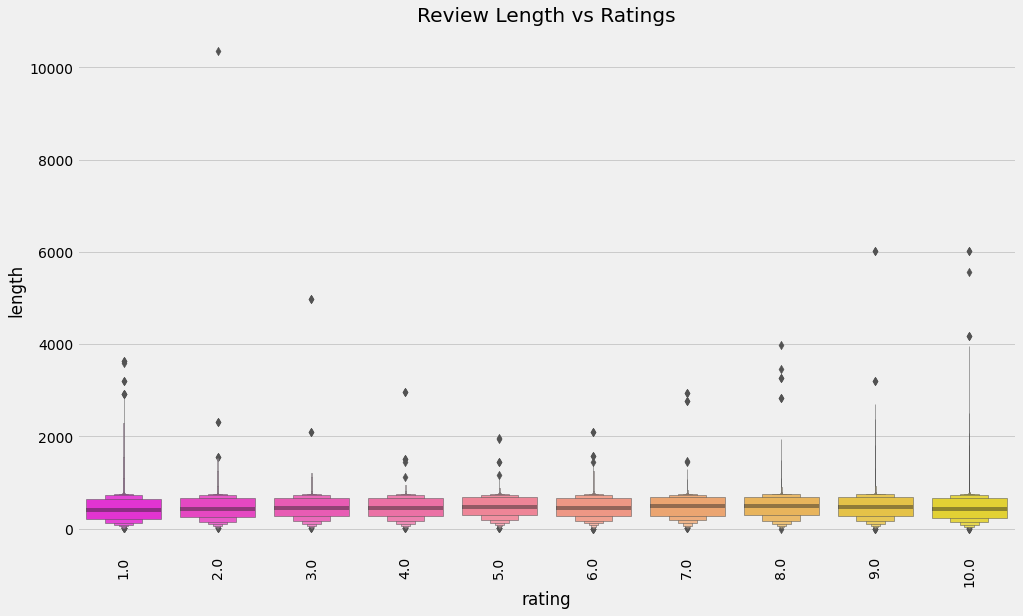

In [ ]:
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')

sns.boxenplot(data['rating'], data['length'], palette = 'spring')
plt.title("Review Length vs Ratings")
plt.xticks(rotation = 90)
plt.show()

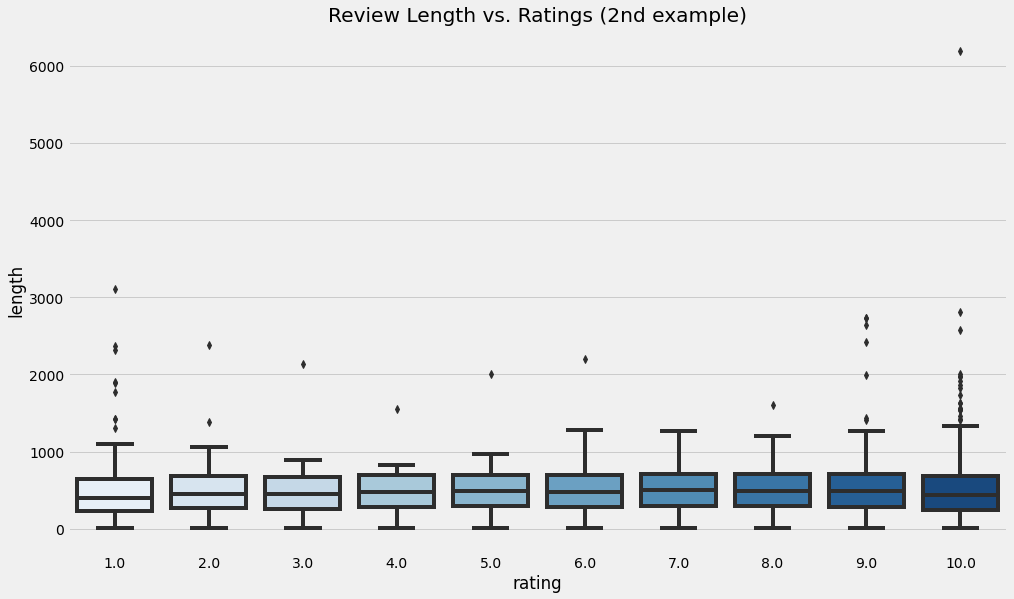

In [ ]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')

sns.boxplot(data['rating'], data['length'], palette = 'Blues')
plt.title("Review Length vs. Ratings (2nd example)")
plt.show()

## Plotting Word Count vs. Ratings

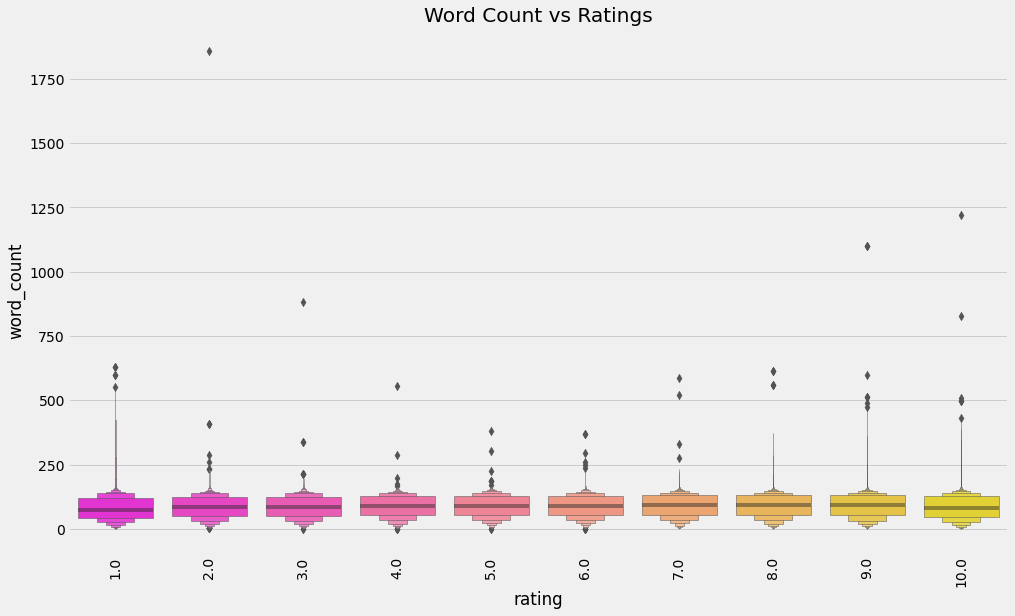

In [ ]:
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')

sns.boxenplot(data['rating'], data['word_count'], palette = 'spring')
plt.title("Word Count vs Ratings")
plt.xticks(rotation = 90)
plt.show()

# Additional text pre-processing

## Remove stopwords

In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
data['review'] = data['review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data['review'].head()

0    "I've tried antidepressants years (citalopram,...
1    "My son Crohn's disease done well Asacol. He c...
2                           "Quick reduction symptoms"
3    "Contrave combines drugs used alcohol, smoking...
4    "I birth control one cycle. After reading revi...
Name: review, dtype: object

## More word needed? Find really frequent words and remove them

In [ ]:
freq = pd.Series(' '.join(data['review']).split()).value_counts()[:50]
freq

I             612455
"I             64121
side           46286
taking         46112
I'm            44603
take           38628
It             38086
get            37722
first          37246
like           36893
started        35422
The            35060
day            33845
My             33733
I've           32331
feel           32181
would          29784
2              29590
years          29015
pain           28937
months         27922
3              26771
days           26565
effects        26196
time           24090
got            23912
back           23296
one            23189
took           23138
doctor         21074
really         20935
pill           20335
still          20316
also           20139
weeks          20010
it.            19946
weight         19531
period         19472
week           18951
went           18730
since          18587
much           18572
medication     18502
never          18449
felt           18292
two            17969
bad            17812
every        

In [ ]:
freq = list(freq.index)
data['review'] = data['review'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
data['review'].head()

## Spelling fixes with Text Blob!

In [ ]:
from textblob import TextBlob
data['review'].apply(lambda x: str(TextBlob(x).correct()))


## Tokenizing text

In [ ]:
TextBlob(data['review'][1]).words


##TBD Stemming

In [ ]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
data['review'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

## Lemmatization - converting words into root words

In [ ]:
from textblob import Word
train['tweet'] = train['tweet'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
train['tweet'].head()

# Vectorization w/ Term Frequency

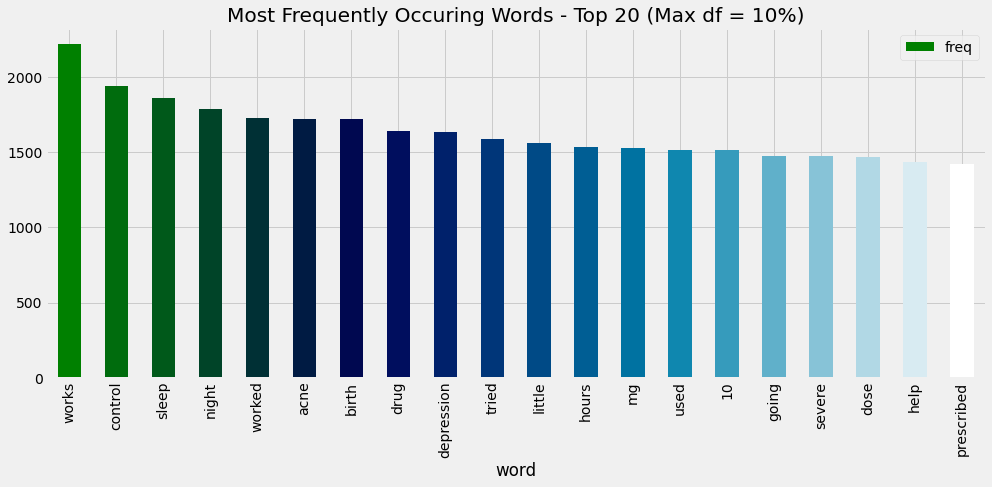

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


cv = TfidfVectorizer(strip_accents=ascii, lowercase=True, analyzer='word', smooth_idf=True, stop_words = 'english', max_df=.10)
words = cv.fit_transform(data.review)
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

plt.style.use('fivethirtyeight')
color = plt.cm.ocean(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 6), color = color)
plt.title("Most Frequently Occuring Words - Top 20 (Max df = 10%)")
plt.show()

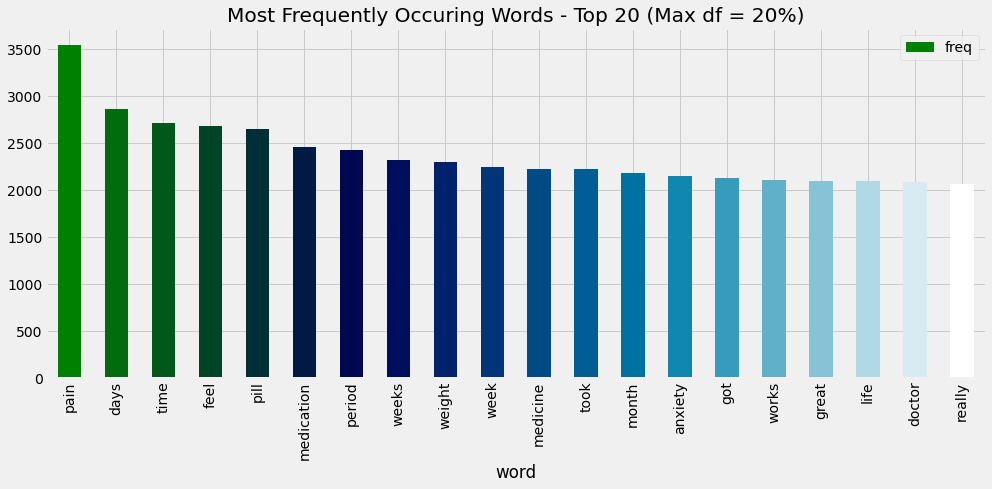

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


cv = TfidfVectorizer(strip_accents=ascii, lowercase=True, analyzer='word', smooth_idf=True, stop_words = 'english', max_df=.20)
words = cv.fit_transform(data.review)
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

plt.style.use('fivethirtyeight')
color = plt.cm.ocean(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 6), color = color)
plt.title("Most Frequently Occuring Words - Top 20 (Max df = 20%)")
plt.show()

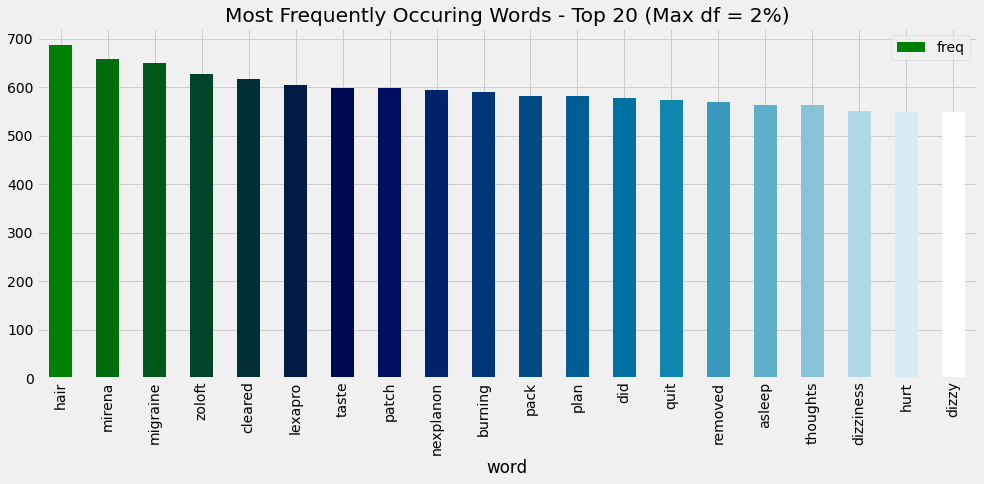

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


cv = TfidfVectorizer(strip_accents=ascii, lowercase=True, analyzer='word', smooth_idf=True, stop_words = 'english', min_df=5, max_df=.02)
words = cv.fit_transform(data.review)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

plt.style.use('fivethirtyeight')
color = plt.cm.ocean(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 6), color = color)
plt.title("Most Frequently Occuring Words - Top 20 (Max df = 2%)")
plt.show()

In [ ]:
words

<150185x18053 sparse matrix of type '<class 'numpy.float64'>'
	with 2285190 stored elements in Compressed Sparse Row format>

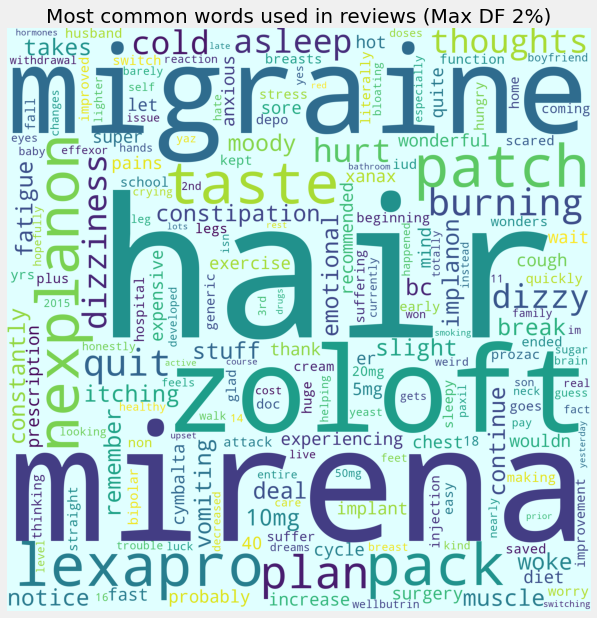

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'lightcyan', width = 2000, height = 2000).generate_from_frequencies(dict(words_freq))

plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(wordcloud)
plt.title("Most common words used in reviews (Max DF 2%)", fontsize = 20)
plt.show()

> Plotting a wordscloud for the Words to see all the words, The Larger the words the larger is the frequency for that word. 

# Word Vectorization and Drug Class


In [ ]:
grouped = data.groupby(by=['drug_class'])
grouped

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

data_by_class = data.groupby('drug_class')

cv = TfidfVectorizer(strip_accents=ascii, lowercase=True, analyzer='word', smooth_idf=True, stop_words = 'english', min_df=5, max_df=.02)
words = cv.fit_transform(data.review)

cv.assign(data.groupby()
                                      .transform("count"))

sum_words = words.sum(axis=0)



words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

plt.style.use('fivethirtyeight')
color = plt.cm.ocean(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 6), color = color)
plt.title("Most Frequently Occuring Words - Top 20 (Max df = 2%)")
plt.show()

KeyboardInterrupt: ignored

# Spacy

In [ ]:
# fix all the messed up apostrophes in the data
data = data.replace('"', "", regex=True)



In [ ]:
import spacy
nlp = spacy.load('en')

def explain_text_entities(text):
    doc = nlp(text)
    for ent in doc.ents:
        print(f'Entity: {ent}, Label: {ent.label_}, {spacy.explain(ent.label_)}')
        
for i in range(15, 50):
    one_sentence = data['review'][i]
    doc = nlp(one_sentence)
    spacy.displacy.render(doc, style='ent',jupyter=True)

nlp = spacy.load('en')

def explain_text_entities(text):
    doc = nlp(text)
    for ent in doc.ents:
        print(f'Entity: {ent}, Label: {ent.label_}, {spacy.explain(ent.label_)}')
        
for i in range(15, 50):
    one_sentence = data['review'][i]
    doc = nlp(one_sentence)
    spacy.displacy.render(doc, style='ent',jupyter=True)


In [ ]:
# cleaning the text
# importing the libraries for Natural Language Processing

import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:

corpus = []


for i in range(0, 3150):
    review = re.sub('[^a-zA-Z]', ' ', data['review'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)
 

In [ ]:
# creating bag of words

from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(corpus)
X_train_counts.shape
print(X_train_counts)



In [ ]:
import spacy
!pip install scattertext
import scattertext as st
nlp = spacy.load('en_core_web_sm')



In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(cv, data['rating'], test_size = 0.3, random_state = 15)


print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

TypeError: ignored

In [ ]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()

x_train = mm.fit_transform(x_train)
x_test = mm.transform(x_test)


# Sentiment Analysis


In [ ]:
from textblob import TextBlob

def get_sentiment(text):
    blob = TextBlob(text)
    return blob.polarity

def get_sentiment_label(text):
    blob = TextBlob(text)
    if blob.polarity > 0:
        result = 'positive'
    elif blob.polarity < 0:
        result = 'negative'
    else:
        result = 'neutral'
    return result

In [ ]:
# Sentiment Score for Review
data['sentiment'] = data['review'].apply(get_sentiment)

KeyboardInterrupt: ignored

In [ ]:
# Sentiment Labels for Review
data['sentiment_label'] = data['review'].apply(get_sentiment_label)

In [ ]:
data[['review','sentiment','sentiment_label']]

# Modeling

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(cv, data['rating'], test_size = 0.3, random_state = 15)


print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

TypeError: ignored

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

cm = confusion_matrix(y_test, y_pred)
print(cm)


Training Accuracy : 0.9913832199546485
Testing Accuracy : 0.9322751322751323
[[ 23  52]
 [ 12 858]]


In [ ]:
# applying k fold cross validation

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 10)

print("Accuracy :", accuracies.mean())
print("Standard Variance :", accuracies.std())

Accuracy : 0.9283764883764883
Standard Variance : 0.014572699477630336


In [ ]:

params = {
    'bootstrap': [True],
    'max_depth': [80, 100],
    'min_samples_split': [8, 12],
    'n_estimators': [100, 300]
}


In [ ]:
# applying grid search with stratified folds

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

cv_object = StratifiedKFold(n_splits = 2)

grid = GridSearchCV(estimator = model, param_grid = params, cv = cv_object, verbose = 0, return_train_score = True)
grid.fit(x_train, y_train.ravel())

GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
            

In [ ]:
print("Best Parameter Combination : {}".format(grid.best_params_))

Best Parameter Combination : {'bootstrap': True, 'max_depth': 100, 'min_samples_split': 8, 'n_estimators': 100}


In [ ]:

print("Mean Cross Validation Accuracy - Train Set : {}".format(grid.cv_results_['mean_train_score'].mean()*100))
print("Mean Cross Validation Accuracy - Validation Set : {}".format(grid.cv_results_['mean_test_score'].mean()*100))

from sklearn.metrics import accuracy_score
print("Accuracy Score for Test Set :", accuracy_score(y_test, y_pred))

Mean Cross Validation Accuracy - Train Set : 96.96733808800614
Mean Cross Validation Accuracy - Validation Set : 92.26757369614512
Accuracy Score for Test Set : 0.9322751322751323
